K-means clustering is a method which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.

## Importing Libraries

In [ ]:
from copy import deepcopy
import numpy as np
import pandas as pd
import random
import math
from matplotlib import pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [ ]:
## Plotting Settings
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Some of the brief description of algorithm is as follows:


1.   Place K centroids at random locations.
2.   Assign all the data points to the closest centroid.
3.  Compute the new centroids as the mean of all points in the cluster
4.   Compute the Sum of Squared errors between new and old centroids


Import Dataset `mydataset.csv` and output shape along with first 5 rows

In [ ]:
# Importing the dataset
df = pd.read_csv('mydataset.csv')
print(f'Data Shape: {df.shape}')
df.head(5)

Data Shape: (86, 2)


,0.227679823996937,0.858204148057458
0,0.979188,0.077151
1,0.504577,0.553114
2,0.058132,0.528098
3,0.775343,0.217922
4,0.550424,0.470860


Extract first column in x variable and second column in y variable

In [ ]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]

Run the below cell to visualize the dataset

Text(0.5, 1.0, 'Initial Scatter plot')

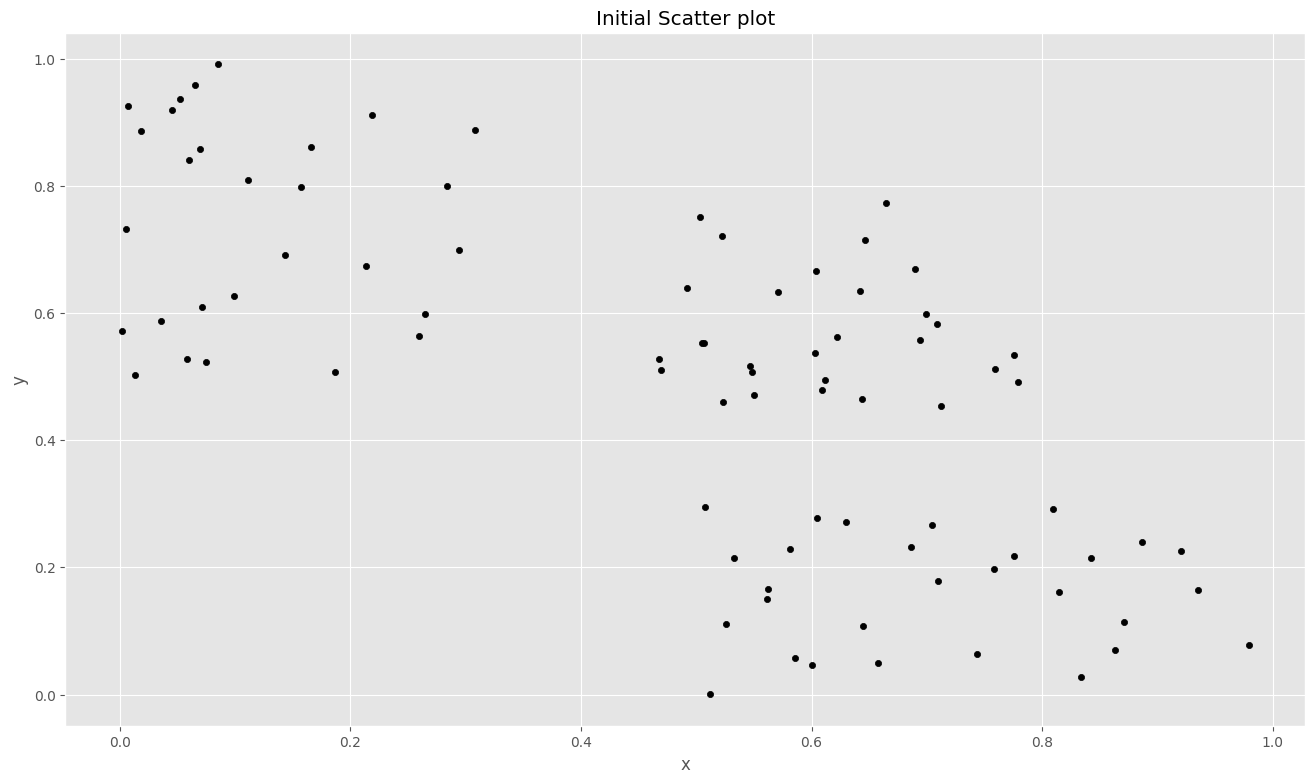

In [ ]:
X = np.array(list(zip(x, y)))
plt.scatter(x, y, c='black', s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial Scatter plot')

Calculate the Euclidean distance

In [ ]:
def euclidean(x, y, ax = 1):
  l2norm = np.sum(np.abs(x - y)**2, axis = 1)**(1/2)
  return l2norm

Generate k random centroids for x and y coordinates with the range of  [0-maximum value in the column]

In [ ]:
# Setting up range for x and y
x_min, x_max = min(x), max(x)
y_min, y_max = min(y), max(y)

In [ ]:
# Number of clusters
k = 3

# X coordinates of random centroids
C_x = [random.uniform(x_min, x_max) for i in range(k)]

# Y coordinates of random centroids
C_y = [random.uniform(y_min, y_max) for i in range(k)]

C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
print("Initial Centroids")
print(C)

Initial Centroids
[[0.09235327 0.35363883]
 [0.30755925 0.32749394]
 [0.264387   0.00699726]]



visualize the dataset along with the centroids using scatter plot

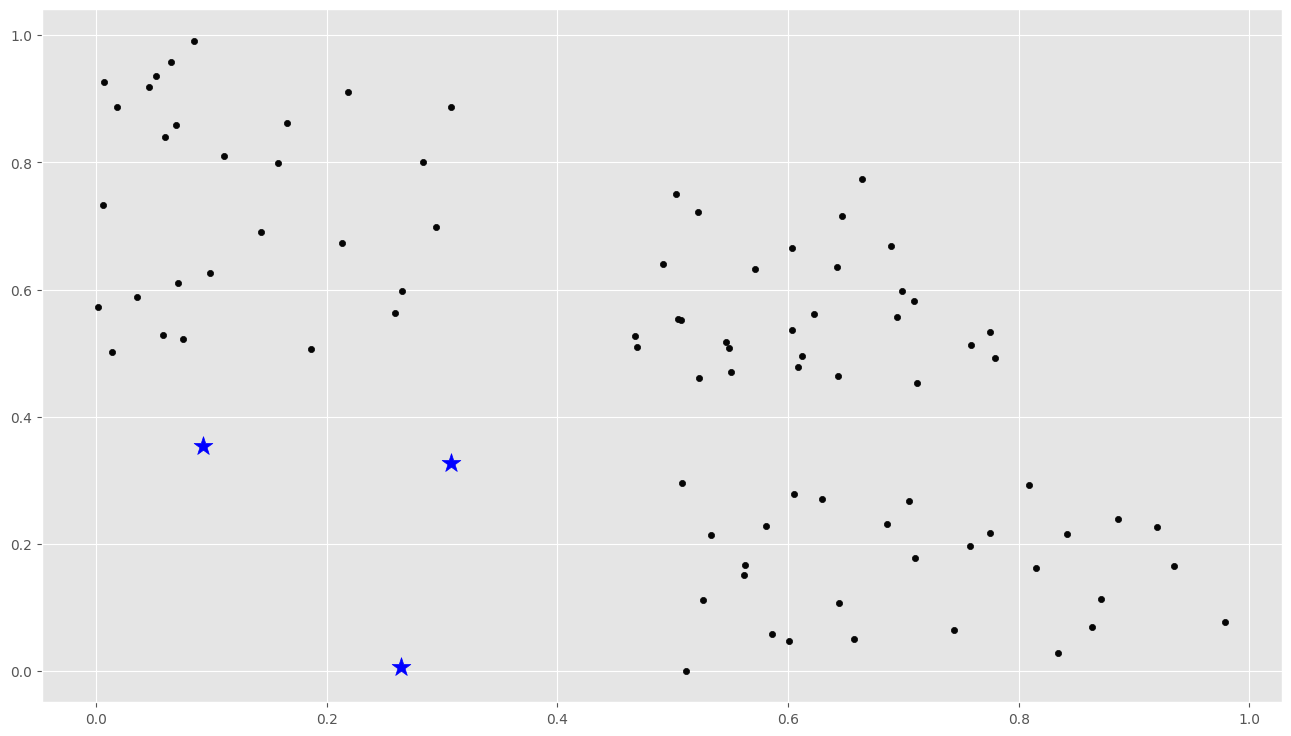

In [ ]:
# Plotting along with the Centroids
plt.scatter(x, y, c = '#050505', s=20)
plt.scatter(C_x, C_y, marker = '*', s=200, c = 'b')

compute error between old centroids and new centroids and return the error

In [ ]:
def computeError(old_centers, new_centers):
  return np.sum((new_centers - old_centers) ** 2)
  pass

In the function `assign_members` you will take all points of the dataset along with the centroids as parameters and will assign the points to the clusters according to their centroids. Return cluster arrays having their corresponding data points.


In [ ]:
def assign_members(centroids):
  clusters = [np.array([[0, 0]])] * 3 # Declaring an empty 3 x 3 np array whose first array will be the x-y coardinates for the first cluster and so on.
  # For each point in the data
  for x_point, y_point in zip(x, y):
    coard = np.array([[x_point, y_point]], dtype = np.float32) # we convert it into a numpy
    min_dist = np.argmin([euclidean(centroids[0], coard), euclidean(centroids[1], coard), euclidean(centroids[2], coard)]) # Calculate min distance from all clusters
    clusters[min_dist] = np.vstack((clusters[min_dist], coard)) # Using the min distance index, accordingly assign the row in clusters that point
  return clusters[0], clusters[1], clusters[2] # return all three clusters seperately.

Define a function that updates the centroid of each cluster. Return updated centroids


In [ ]:
def update_centroids(cluster1, cluster2, cluster3):
  # Your code goes here
  return np.mean(cluster1, axis = 0), np.mean(cluster2, axis = 0), np.mean(cluster3, axis = 0)

Implement K-Mean algorithm from scratch.

In [ ]:
# Initialize original cluster
old_centroids = C

error = 10000000

while error != 0:
  # Assign points to nearest clusters
  cluster1, cluster2, cluster3 = assign_members(old_centroids)
  # Get new centroids by taking mean of each cluster
  updated_centroids = update_centroids(cluster1, cluster2, cluster3)
  # Combine the centroids
  updated_centroids = np.vstack((np.vstack((updated_centroids[0], updated_centroids[1])), updated_centroids[2]))
  # Compute error
  error = computeError(old_centroids, updated_centroids)
  # Assign old to updated before next iteration
  old_centroids = updated_centroids

old_centroids

array([[0.11621531, 0.71702428],
       [0.58891676, 0.55217442],
       [0.68796767, 0.15745729]])

In [ ]:
# Now get the data points for each of the three centroids
c1, c2, c3 = assign_members(old_centroids)

In [ ]:
# Due to assigining 0's intially, we have to remove them from c1, c2, c3
c1, c2, c3 = c1[1:], c2[1:], c3[1:]

In [ ]:
# Joining them as a list to make easier iteration
neighbours = [c1, c2, c3]

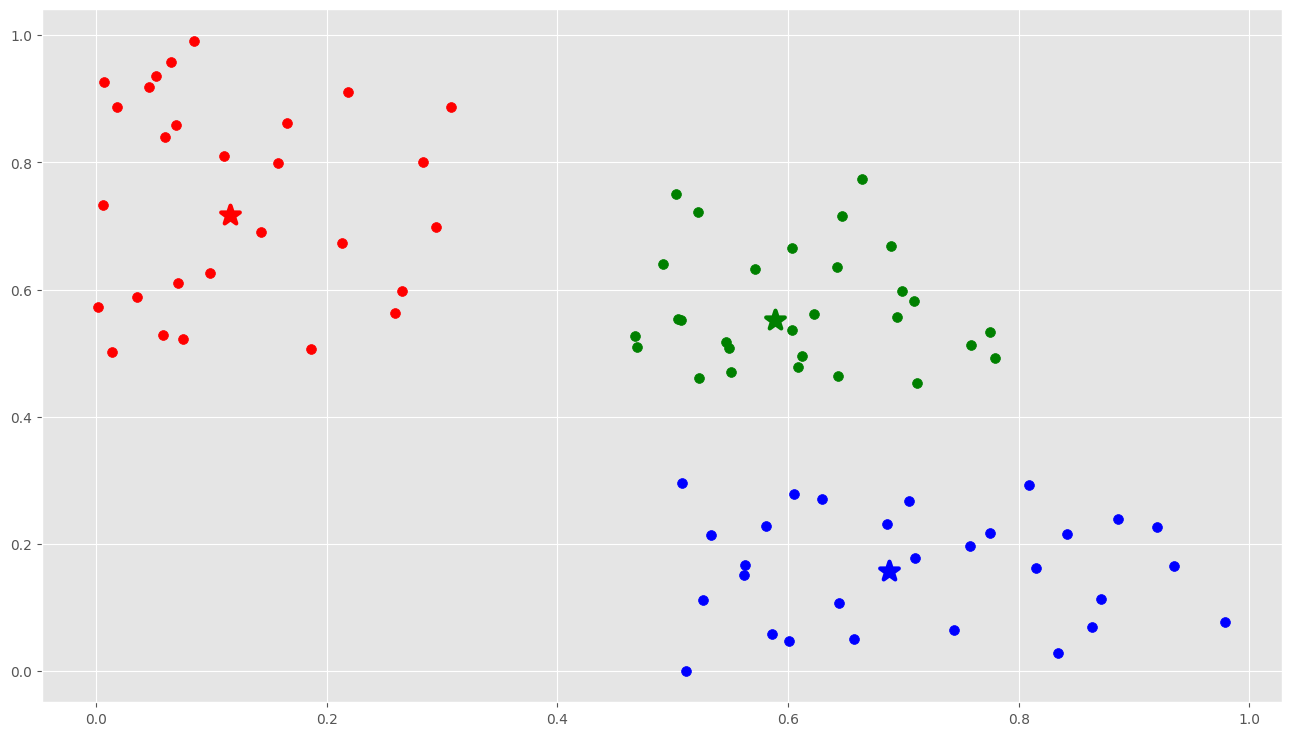

In [ ]:
# Visualising Clusters
colors = ['r', 'g', 'b']
for i in range(k):
  plt.scatter(neighbours[i][:, 0], neighbours[i][:, 1], s = 50, c = colors[i])
  plt.scatter(old_centroids[i][0], old_centroids[i][1], marker = '*', s = 200, linewidths = 3, c = colors[i])